# Title: Big Mart sale prediction

![mart](IMG12.JPG)

# problem statement

<div class="alert alert-block alert-success">
<b>problem statement:</b> The problem statement of Big Mart sales prediction is to build a machine learning model that can predict the sales of a product at a particular store. The model will be trained on past sales data for a variety of products and stores, as well as other relevant factors such as product category,item weight,item type and size of items. Once the model is trained, it can be used to predict future sales for new products and stores.

In simple words, the problem is to find a way to use data about past sales, products, stores, and other factors to predict how many units of a particular product will be sold at a particular store in the future.
</div>

# 1. import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import missingno
from sklearn.metrics import accuracy_score

# 2. Exploratory data analysis (EDA)

<div class="alert alert-block alert-info">
<b>detail:</b>explaination of big_mart_sale datasets
</div>

Column name------------->Description
1. Item_Weight------>Weight of the product in kilograms. (Numeric)
2. Item_Fat_Content------>The fat content of the product. (Categorical)
3. Item_Visibility------->The visibility of the product in store or online. (Numeric)
4. Item_Type------>The type of product, such as limited offers or no offer. (Categorical)
5. Item_MRP------>The maximum retail price of the product. (Numeric)
6. Outlet_Establishment_Year------->The year the outlet was established. (Numeric)
7. Outlet_Size------>The size of the outlet, either retail or supermarket. (Categorical)
8. Outlet_Location_Type-------->The type of location of the outlet, such as urban or rural area. (Categorical)
9. Outlet_Type-------->The type of outlet, such as sales departmental store or supermarket. (Categorical)
10. Item_Outlet_Sales-------->The sales of the product in the outlet. (Numeric)

In [2]:
#import the big_mart dataset
big_mart_dataset=pd.read_csv("D:\\AI\\project by siddharkhan\\project code and data\\data\\big_mart_sale_prediction.csv")

In [3]:
#print first 5 rows
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#print last 5 rows
big_mart_dataset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#number of data point & number of features
big_mart_dataset.shape

(8523, 12)

In [6]:
#getting some inforamtion about dataset
big_mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#finding missing values in dataset
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

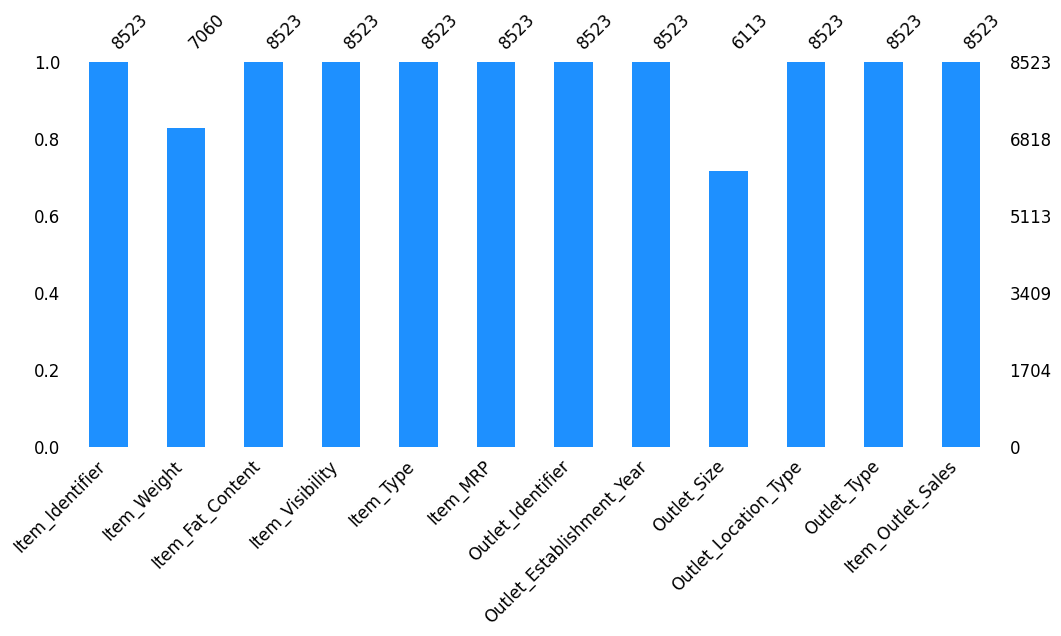

In [8]:
#finding missing value by bar graph
missingno.bar(big_mart_dataset, color='dodgerblue', figsize=(12,5),fontsize=12);

In [9]:
big_mart_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#it shows types of column in dataset which column are object and which are float and int
big_mart_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

catagorical features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type              

<Axes: ylabel='count'>

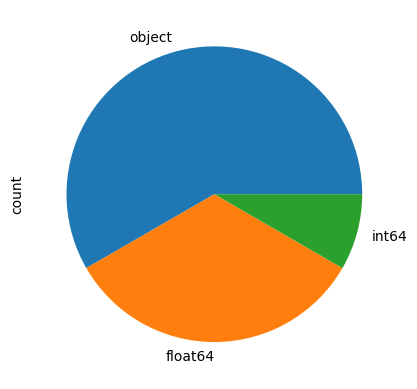

In [11]:
big_mart_dataset.dtypes.value_counts().plot.pie()

In [12]:
sns.set()

<Figure size 600x600 with 0 Axes>

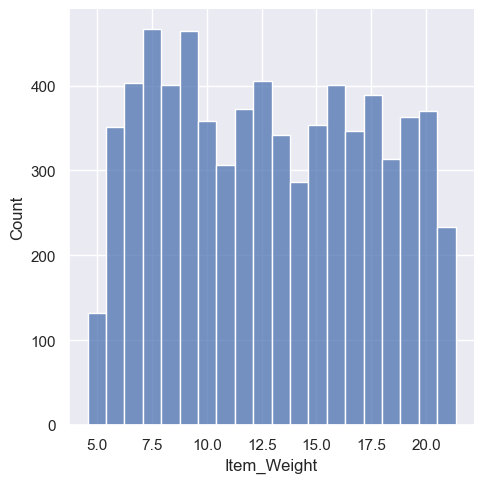

In [13]:
#item_weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

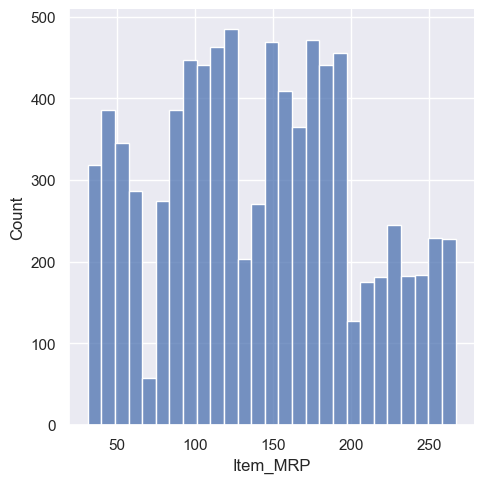

In [14]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_MRP'])
plt.show()

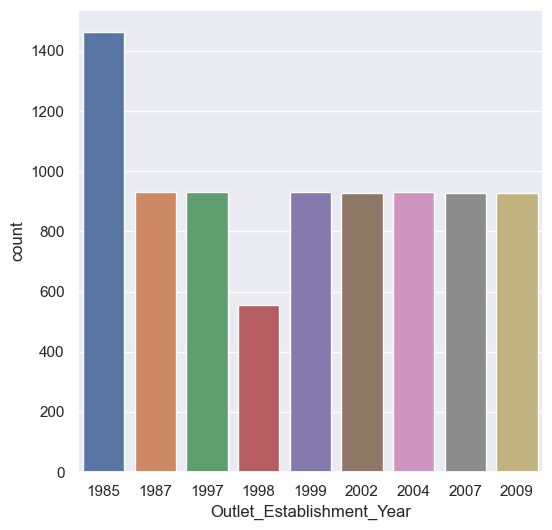

In [15]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_dataset)
plt.show()

# 3. pre-processing

### handling missing values

- mean ->average value
- mode ->most repeated value

In [16]:
#first of all find mean value of "item_weight" column of big_mart_dataset
big_mart_dataset['Item_Weight'].mean()

12.857645184135976

In [17]:
#we will fill null value in "item_weight"column with mean value
big_mart_dataset['Item_Weight'].fillna(big_mart_dataset['Item_Weight'].mean(), inplace=True)

In [18]:
#let's find the null value again
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
#we will fill null value in "Outlet_Size"column with mode value
big_mart_dataset['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
#we will fill null value in "Outlet_Size" column with mode value
mode_of_outlet_size = big_mart_dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

Outlet_Type-------------->Outlet_Size(mode_value)
- Grocery store---------->small
- supermarket_type1------>small
- supermarket_type2------>medium
- supermarket_type3------>medium

In [21]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [22]:
missing_value = big_mart_dataset['Outlet_Size'].isnull()

In [23]:
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [24]:
big_mart_dataset.loc[missing_value,'Outlet_Size'] = big_mart_dataset.loc[missing_value,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [25]:
#let's find the null value again
big_mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### convert catagorical data to numerical

In [26]:
#let's print "Item_Fat_Content" column 
big_mart_dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

________________________________
convert 
- LF----to---->Low Fat
- low fat---to--->Low Fat
- reg----t0-----Regular

In [27]:
big_mart_dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [28]:
#let's print "Item_Fat_Content" column again that the value are change or not
big_mart_dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### label encoding 

In [29]:
encoding = LabelEncoder()

In [30]:
big_mart_dataset['Item_Identifier'] = encoding.fit_transform(big_mart_dataset['Item_Identifier'])

big_mart_dataset['Item_Fat_Content'] = encoding.fit_transform(big_mart_dataset['Item_Fat_Content'])

big_mart_dataset['Item_Type'] = encoding.fit_transform(big_mart_dataset['Item_Type'])

big_mart_dataset['Outlet_Identifier'] = encoding.fit_transform(big_mart_dataset['Outlet_Identifier'])

big_mart_dataset['Outlet_Location_Type'] = encoding.fit_transform(big_mart_dataset['Outlet_Location_Type'])

big_mart_dataset['Outlet_Type'] = encoding.fit_transform(big_mart_dataset['Outlet_Type'])

big_mart_dataset['Outlet_Size'] = encoding.fit_transform(big_mart_dataset['Outlet_Size'])

In [31]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### split the features and target

In [32]:
X = big_mart_dataset.drop('Item_Outlet_Sales',axis=1)
Y = big_mart_dataset['Item_Outlet_Sales']

In [33]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [34]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# 4. data spliting

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# 5. model selection

In [37]:
regression = XGBRegressor()

In [38]:
regression.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# 6. evaluation

In [39]:
#prediction on training data
prediction = regression.predict(X_train)

In [40]:
accuracy = metrics.r2_score(prediction,Y_train)

In [41]:
print(accuracy)

0.813599695558012
